# 미분방정식을 풀기 위한 수치적 방법들

여기서는 주로 2가지 방법을 다룬다.

- [Euler method](https://en.wikipedia.org/wiki/Euler_method)
- [Runge-Kutta methods](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) (여기서는 2nd order Runge-Kutta를 다루고, 코드에서 `rk2_algorithm`이라고 부른다.)

일단 import부터 하자.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Euler method

초기조건은 $\begin{bmatrix} x_0 \\ \dot{x_0} \end{bmatrix}$, 점화식은 다음과 같다.

$$
\begin{bmatrix} x_{i+1} \\ x_{i+1}' \end{bmatrix} = \begin{bmatrix} x_i \\ x_i' \end{bmatrix} + \begin{bmatrix} x_i' \\ x_i'' \end{bmatrix}h
$$

(정형식쌤 코드를 약간 수정)

In [2]:
def euler_method(f, t_start, t_end, y_init, step):
    t = np.linspace(t_start, t_end, step)
    h = t[1] - t[0]
    Y = np.array([y_init])
    y = y_init
    n = 0
    while len(Y) < len(t):
        y = y + h * f(y, t[n])
        Y = np.append(Y, [y], axis=0)
        n += 1
    return Y, t

## RK2 algorithm

Euler Method보다 약간 더 정확하다.

(이것도 정형식쌤 코드를 약간 수정)

In [3]:
def rk2_algorithm(f, t_start, t_end, y_init, step):
    t = np.linspace(t_start, t_end, step)
    h = t[1] - t[0]
    Y = np.array([y_init])
    y = y_init
    n = 0
    while len(Y) < len(t):
        y_rk2 = y + h * f(y, t[n]) / 2
        y = y + h * f(y_rk2, t[n] + h / 2)
        Y = np.append(Y, [y], axis=0)
        n += 1
    return Y, t

## 예시: 단순 조화진동자

물리학에서 유명한 단순 조화진동자는 다음과 같은 미분방정식으로 기술할 수 있다.

$$
-kx = m\frac{d^2x}{dt^2}
$$

한번 이 미분방정식을 풀어서 실제 위치를 그래프로 나타내어 보자. (정형식쌤 코드 약간 수정)

우선 상수값들을 설정한다. (여기서는 $x_0 = 3, v_0 = 0, y_0 = \begin{bmatrix} x_0 \\ v_0 \end{bmatrix}, k = 50, m = 200$으로 정했다.)

In [4]:
x_init = 3
v_init = 0
y_init = np.array([x_init, v_init])
k = 50
mass = 200

다음과 같은 조화진동자 함수를 정의한다.

In [5]:
def harmonic(y, t):
    acceleration = (-k / mass) * y[0]
    velocity = y[1]
    result = np.array([velocity, acceleration])
    return result

이제 수치해석 알고리즘에 넣어서 답을 얻는다.

In [6]:
solution1 = euler_method(harmonic, 0, 30, y_init, 1000)
solution2 = rk2_algorithm(harmonic, 0, 30, y_init, 1000)
x1 = solution1[0][:,0]
x2 = solution2[0][:,0]
t = solution1[1]

실제값 (미분방정식을 풀어 나온 값)도 구해보자. [위키피디아](https://en.wikipedia.org/wiki/Harmonic_oscillator)에 따르면 위에서 보여주었던 방정식의 해는 다음과 같다.

$$
x(t) = A\cos{\sqrt{\frac{k}{m}}t}
$$

In [7]:
exact = 3 * np.cos(np.sqrt(k / mass) * t)

이제 한번 그려서 `euler_method`와 `rk2_algorithm`의 정확도를 보자.

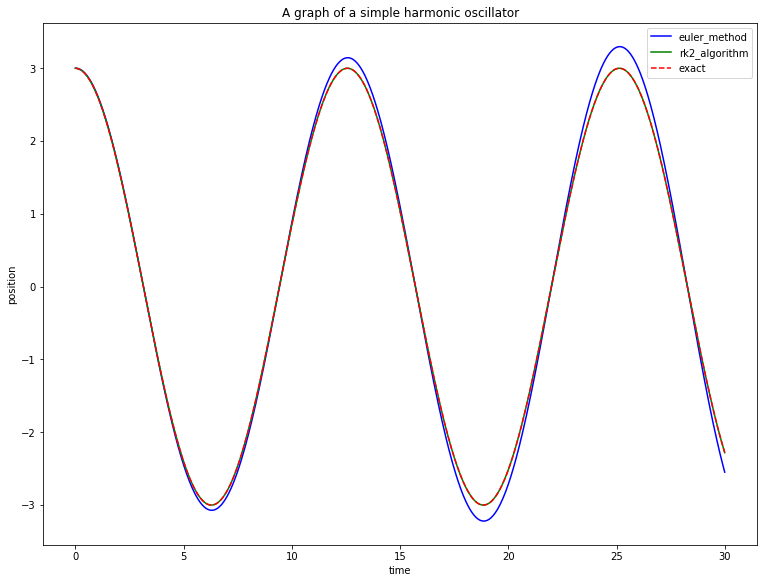

In [8]:
%matplotlib inline
plt.figure(figsize=(12.8, 9.6))
plt.plot(t, x1, 'b-', label='euler_method')
plt.plot(t, x2, 'g-', label='rk2_algorithm')
plt.plot(t, exact, 'r--', label='exact')
plt.title('A graph of a simple harmonic oscillator')
plt.xlabel('time')
plt.ylabel('position')
plt.legend(loc='best')
plt.show()

실제값과 RK2가 매우 근접한 것을 볼 수 있다.